## Data

Boston Housing Prices data can be found at [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing). 


In [1]:
#Import libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

Print basic information about the data

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
print(bdata.DESCR)

dict_keys(['target', 'DESCR', 'data', 'feature_names'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

## Descriptive analysis

### Housing Prices

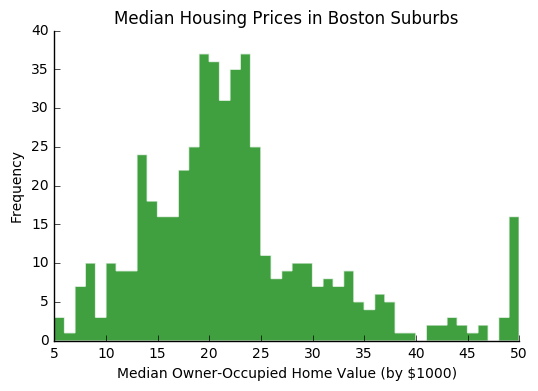

In [4]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt

#Define ax subplot to edit axes
ax = plt.subplot(111)

#Create histogram with binwidth=1 ($1000)
#Set color to green and histtype to one that doesn't include borders
ax.hist(bdata.target,bins=np.arange(min(bdata.target),max(bdata.target)+1,1),
       facecolor="green", color="white", histtype="step", alpha=0.75, fill=True)

#Get rid of axes and tick marks on top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

#Add title, xlabels, and ylabels
plt.title("Median Housing Prices in Boston Suburbs")
plt.xlabel("Median Owner-Occupied Home Value (by $1000)")
plt.ylabel("Frequency")

#Show plot
plt.show()

### Housing Prices vs. Crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


In [5]:
#Create pd dataframe for data with the correct types of data for each variable
boston_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
boston_df["MEDV"] = pd.DataFrame(bdata.target, columns=["MEDV"])
boston_df["RAD"] = boston_df["RAD"].astype(int)
boston_df["CHAS"] = boston_df["CHAS"].astype(object)

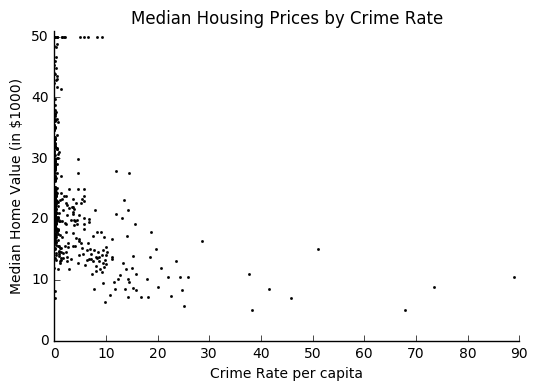

In [6]:
#Create scatterplot of MEDV vs. CRIM
ax1 = plt.subplot(111)
ax1.plot(boston_df.CRIM, boston_df.MEDV, "ko", markersize=1.5)
ax1.set_ybound(0,51)

#Get rid of axes and tick marks on top and right
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.yaxis.set_ticks_position("left")
ax1.xaxis.set_ticks_position("bottom")

#Add title, xlabels, and ylabels
plt.title("Median Housing Prices by Crime Rate")
plt.xlabel("Crime Rate per capita")
plt.ylabel("Median Home Value (in $1000)")

#Show Plot
plt.show()

### Lower Status Population, Crime Rates, and Median Home Value

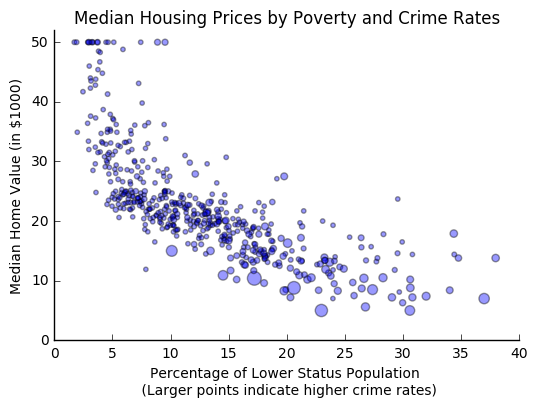

In [7]:
#Plot Median Household Income by Distance to Employment Center
#Each point's size will be determined by proportion of buildings built before 1940

#Create scatterplot of MEDV vs. LSTAT with point size determined by crime rate
ax2 = plt.subplot(111)
ax2.scatter(boston_df.LSTAT, boston_df.MEDV, s=boston_df.CRIM+10, alpha=0.4)
ax2.set_ybound(0,52)
ax2.set_xbound(0,40)

#Get rid of axes and tick marks on top and right
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_ticks_position("left")
ax2.xaxis.set_ticks_position("bottom")

plt.title("Median Housing Prices by Poverty and Crime Rates")
plt.xlabel("Percentage of Lower Status Population \n (Larger points indicate higher crime rates)")
plt.ylabel("Median Home Value (in $1000)")

plt.show()

This plot shows the strong, negative, curved corrleation between the percentage of neighborhoods' lower status population and median home value. In addition, the size of each point corresponds to each neighborhood's crime rate. As expected from problem 1.2, larger points cluster around neighborhoods with low median home values. Furthermore, large points don't appear until lower status population reaches approximately 10%. In other words, above-average crime rates appear to be correlated with neighborhoods with at least 10% of the population classified as "lower status" in addition to neighborhoods with lower median home values (explained in problem 1.2).

## Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

In [8]:
#Function for root mean squared error

"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
print(compute_rmse((2,2,3),(0,2,6)))
2.08
"""
def compute_rmse(predictions, yvalues):
    resid = np.subtract(predictions,yvalues)
    squared_resid = resid**2
    n = squared_resid.size
    sum_squared_resid = np.sum(squared_resid)
    rmse = np.sqrt(sum_squared_resid/n)
    return rmse
print("Example: RMSE[(2,2,3),(0,2,6)] = %.2f" % (compute_rmse((2,2,3),(0,2,6))))

Example: RMSE[(2,2,3),(0,2,6)] = 2.08


### Train and Test Split

Randomly select 66% of the data and put this in a training dataset. Place the remaining 34% in a testing dataset.


In [9]:
#Splitting data using train_test_split. Use random state to repeat analysis.
from sklearn.cross_validation import train_test_split

bdata_train, bdata_test = train_test_split(boston_df, test_size=0.34, random_state=200)

### Very basic baseline prediction for comparison

For every observation x_i, predict the median home value as the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training and testing sets.  

In [10]:
#Poor Model function
def poor_model(median_values):
#Calculate the average median home value of training set
    pred_value = np.mean(median_values)
#Use this average as prediction for each element
    pred_array = np.asarray([pred_value]*median_values.size)
    return(pred_array)

#Find RMSE for training set
poor_model_pred_train = poor_model(bdata_train.MEDV)
poor_model_rmse_train = compute_rmse(poor_model_pred_train, bdata_train.MEDV)

#Find RMSE for testing set
poor_model_pred_test = poor_model(bdata_test.MEDV)
poor_model_rmse_test = compute_rmse(poor_model_pred_test, bdata_test.MEDV)

#Print the results for each
print("Training RMSE: %.4f" % poor_model_rmse_train)
print("Testing RMSE: %.4f" % poor_model_rmse_test)

Training RMSE: 8.6133
Testing RMSE: 10.2023


The testing RMSE is larger than the training RMSE (10.2023 vs. 8.6133, respectively). This model uses the average of median home values as its prediction for every datapoint. As we saw in the exploratory analysis, the actual median home values vary from \$5,000 to \$50,000, so a uniform prediction isn't going to perform well.

Since we are only using a simple mean for our predictions, the testing set is likely to perform worse than the training set since it has half the amount of data (i.e., $\frac{n_{testing}}{n_{training}} \approx \frac{1}{2}$). If we use this method, large errors (e.g., \$50,000 houses) will weigh more heavily on the smaller testing set's RMSE. 

---

## Nearest Neighbors


### Nearest Neighbors: Distance function

Create L-norm distance metric to measure the distance and similarity between two observations.

In [11]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : float
    The L-norm distance between instances

Example
-------
print(distance((3,4),(6,8),2))
5

"""

#Euclidean distance is measured by the sum of sqrt((x1-x2)^2))
#Create function that outputs this distance for given values of x1, x2, and L
def distance(x1, x2, L):
    sum_dist = 0
    for k in range(L):
        sum_dist += (x1[k] - x2[k])**2
    dist = sum_dist**(1/2)
    return dist

#Example
print("Example: Sets (3,4) and (6,8) with L=2 results in the L-Norm Distance %.1f" % (distance((3,4),(6,8),2)))

Example: Sets (3,4) and (6,8) with L=2 results in the L-Norm Distance 5.0


### Nearest Neighbor algorithm

The following implements a basic nearest neighbor algorithm from scratch.

In [12]:
"""
Function
--------
nneighbor
knn       ***IMPORTANT NOTE: I COMMENTED OUT THE nneighbor FUNCTION.
             INSTEAD, I CREATED A ROBUST FUNCTION knn THAT USES K=1
             AS THE DEFAULT. I FIGURED IT WOULD BE BETTER TO USE knn
             THROUGHOUT INSTEAD OF JUST PARTS 3.6 AND 3.7.***

Given training and testing datasets:
predict response variable using (k) nearest neighbors methods on training data.
Compare the prediction with the actual value in the testing data. 
Repeat for each testing instance.
Report the RMSE.

Parameters
----------
testing_data, training_data : array
    Array of explatatory variables and one response variable (which must be listed last)
    One array for testing data, one for training data (with matching variable names)

L: int
    Value of L to use in computing distances
    
K: (optional) int
    Number of neighbors to use for predicting MEDV. Default is K=1.

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
knn(test_set, train_set, length)

"""

#Import time in order to display time for calculation
import time


def knn(testing_data, training_data, L, K=1):
    #Begin calculation timer
    start_time = time.time()
    
    #Define empty arrays for: 
    #(1) The model predicted median home values for each testing instance  
    #(2) The actual median home values for each testing instance   
    predict_medv = []
    actual_medv = []
    
    #Loop over all testing instances
    for i in range(len(testing_data)):
        
        #Define current_test as the current iteration's testing values for each feature/variable
        current_test = testing_data[i]
        
        #Create empty array that will contain euclidean distances between current testing instance and every training instance
        distances = []
        
        #Loop the current testing instance over all training instances
        for j in range(len(training_data)):
            
            #Define current_train as the current iteration's training values for each feature/variable
            current_train = training_data[j]
            
            #Calculate distance between the jth training instance for testing instance i and append the following to the distance array:
            #(1) The current training instances values for explanatory and response features/variables
            #(2) The euclidean distance
            current_dist = distance(current_train, current_test, L)
            distances.append((current_train, current_dist))
        
        #After finding each distance between the current testing instance and all training instances,
        #Sort the distances array by euclidean distances (ascending order)
        distances.sort(key=lambda x: x[1])
        
        #Create empty array that will contain the training response variable (Lth feature is MEDV in this case)
        #Iterate over given K (default is K=1) and add the training response variable for the first K values in sorted distance array (i.e., K closest neighbors)
        k_nearest_dist = []
        for k in range(K):
            k_nearest_dist.append(distances[k][0][L])
        
        #Calculate the mean of the K closest neighbors as the predicted response of the current test instance.
        k_mean_dist = np.mean(k_nearest_dist)
        
        #Append the prediction and actual response values for the current test instance
        predict_medv.append(k_mean_dist)
        actual_medv.append(current_test[L])
    
    #After completing the loop for each testing instance, calculate the RMSE using the predicted and actual arrays
    rmse = compute_rmse(predict_medv,actual_medv)
    
    #Print the time taken to run knn function
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

#For this example, we are going to use CRIM and RM to predict MEDV
test_set = np.asarray(bdata_test[["CRIM","RM","MEDV"]])
train_set = np.asarray(bdata_train[["CRIM","RM","MEDV"]])
length = 2

print("RMSE for K=1 nearest neighbor predicted MEDV response using CRIM and RM predictors: %.4f" % (knn(test_set, train_set, length)))

Time taken: 0.21 seconds
RMSE for K=1 nearest neighbor predicted MEDV response using CRIM and RM predictors: 7.8237


### Re-run with Normalization

The following creates a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.

In [13]:
"""
Function
--------
normalize

Given raw data, return the standard normal values for each predicting feature (i.e., all but the last given variable/feature)

Parameters
----------
raw_data : array
    Array of explatatory variables and one response variable (which must be listed last)

Returns
-------
normalized_data : array
    Array of normalized predicting features and untransformed response feature

Example
-------
norm_test_set_1 = normalize(test_set) (used below)

"""

def normalize(raw_data):
    n_instances = len(raw_data)
    n_features = raw_data.shape[1]
    normalized_data = np.zeros(shape=(n_instances,n_features))
    normalized_data[:,n_features-1] = raw_data[:,n_features-1]
    for i in range(n_features-1):
        current_feature_mean = np.mean(raw_data[:,i])
        current_feature_sd = np.std(raw_data[:,i])
        normalized_data[:,i] = (raw_data[:,i]-current_feature_mean)/current_feature_sd        
    return normalized_data

norm_test_set_1 = normalize(test_set)
norm_train_set_1 = normalize(train_set)
length = 2

print("RMSE for K=1 nearest neighbor predicted MEDV response using normalized CRIM and RM predictors: %.4f" % (knn(norm_test_set_1, norm_train_set_1, length)))

Time taken: 0.22 seconds
RMSE for K=1 nearest neighbor predicted MEDV response using normalized CRIM and RM predictors: 9.6932


After normalizing the predicting features, our model reports a larger RMSE compared to the previous, untransformed features. Without normalizing, our goodness-of-fit measure, RMSE, is overly optimistic.

### Optimization

Increase performance of nearest neighbor algorithm by adding relevant features, and by using different values of L in the distance function.  

In [14]:
#different two features (DIS, LSTAT)
norm_test_set_2 = normalize(np.asarray(bdata_test[["DIS","LSTAT","MEDV"]]))
norm_train_set_2 = normalize(np.asarray(bdata_train[["DIS","LSTAT","MEDV"]]))
length = 2

print("RMSE for predicted MEDV response using L=2 normalized DIS and LSTAT predictors: %.4f" % (knn(norm_test_set_2, norm_train_set_2, length)))

Time taken: 0.21 seconds
RMSE for predicted MEDV response using L=2 normalized DIS and LSTAT predictors: 6.7820


In [15]:
#three features (RM, DIS, LSTAT)
norm_test_set_3 = normalize(np.asarray(bdata_test[["RM","DIS","LSTAT","MEDV"]]))
norm_train_set_3 = normalize(np.asarray(bdata_train[["RM","DIS","LSTAT","MEDV"]]))
length = 3

print("RMSE for predicted MEDV response using L=3 normalized RM, DIS and LSTAT predictors: %.4f" % (knn(norm_test_set_3, norm_train_set_3, length)))

Time taken: 0.27 seconds
RMSE for predicted MEDV response using L=3 normalized RM, DIS and LSTAT predictors: 6.2181


In [16]:
#four features (RM, DIS, PTRATIO, LSTAT)
norm_test_set_4 = normalize(np.asarray(bdata_test[["RM","DIS","PTRATIO","LSTAT","MEDV"]]))
norm_train_set_4 = normalize(np.asarray(bdata_train[["RM","DIS","PTRATIO","LSTAT","MEDV"]]))
length = 4

print("RMSE for predicted MEDV response using L=4 normalized RM, DIS, PTRATIO, and LSTAT predictors: %.4f" % (knn(norm_test_set_4, norm_train_set_4, length)))

Time taken: 0.34 seconds
RMSE for predicted MEDV response using L=4 normalized RM, DIS, PTRATIO, and LSTAT predictors: 5.3535


In [17]:
#five features (CRIM, RM, DIS, PTRATIO, LSTAT)
norm_test_set_5 = normalize(np.asarray(bdata_test[["CRIM","RM","DIS","PTRATIO","LSTAT","MEDV"]]))
norm_train_set_5 = normalize(np.asarray(bdata_train[["CRIM","RM","DIS","PTRATIO","LSTAT","MEDV"]]))
length = 5

print("RMSE for predicted MEDV response using L=5 normalized CRIM, RM, DIS, PTRATIO, and LSTAT predictors: %.4f" % (knn(norm_test_set_5, norm_train_set_5, length)))

Time taken: 0.36 seconds
RMSE for predicted MEDV response using L=5 normalized CRIM, RM, DIS, PTRATIO, and LSTAT predictors: 5.4144


In [18]:
#six features (CRIM, RM, DIS, PTRATIO, TAX, LSTAT)
norm_test_set_6 = normalize(np.asarray(bdata_test[["CRIM","RM","DIS","PTRATIO","TAX","LSTAT","MEDV"]]))
norm_train_set_6 = normalize(np.asarray(bdata_train[["CRIM","RM","DIS","PTRATIO","TAX","LSTAT","MEDV"]]))
length = 6

print("RMSE for predicted MEDV response using L=6 normalized CRIM, RM, DIS, PTRATIO, TAX, and LSTAT predictors: %.4f" % (knn(norm_test_set_6, norm_train_set_6, length)))

Time taken: 0.43 seconds
RMSE for predicted MEDV response using L=6 normalized CRIM, RM, DIS, PTRATIO, TAX, and LSTAT predictors: 5.3246


In [19]:
#seven features (CRIM, NOX, RM, DIS, PTRATIO, TAX, LSTAT)
norm_test_set_7 = normalize(np.asarray(bdata_test[["CRIM","NOX","RM","DIS","PTRATIO","TAX","LSTAT","MEDV"]]))
norm_train_set_7 = normalize(np.asarray(bdata_train[["CRIM","NOX","RM","DIS","PTRATIO","TAX","LSTAT","MEDV"]]))
length = 7

print("RMSE for predicted MEDV response using L=7 normalized CRIM, NOX, RM, DIS, PTRATIO, TAX, and LSTAT predictors: %.4f" % (knn(norm_test_set_7, norm_train_set_7, length)))

Time taken: 0.47 seconds
RMSE for predicted MEDV response using L=7 normalized CRIM, NOX, RM, DIS, PTRATIO, TAX, and LSTAT predictors: 5.1692


Starting with L=2, I predicted MEDV using DIS and LSTAT. I then fit one model for L=3,4,5,6,7 by adding one more predicting feature to the previous model. (Note: Each model used normalized predicting features.)

My chosen predictors DIS and LSTAT for L=2 actually reported a much lower RMSE than the original CRIM and RM. I suspected that LSTAT was going to be a very good predictor both through (1) Intuition (i.e., neighborhoods with lower average status likely have lower home values), and (2) the strong relationship shown in my chosen plot for problem 1.3.

Adding RM (L=3) and then PTRATIO (L=4) showed even more improvement in the reported RMSE. From that point forward, adding variables only slightly reduced RMSE—pointing to possible overfitting and definite overcomplication. 

### 3.5 Cross-Validation

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance. Report the average RMSE across the 10 iterations.

In [20]:
"""
Function
--------
my_kfolds

Given the full dataframe, number of folds, features of interest (response variable last), and number of neighbors for prediction,
return the average rmse from each fold using cross-validation.

Parameters
----------
full_df : pandas dataframe
    Dataframe containing all columns and rows
    
nfolds : int
    Desired number of folds for cross-validation

features : string
    List of features/variables to use in the model with the response feature/variable listed last.
    Must be in the form ["explanatory_feature_1","explanatory_feature_2",...,"explanatory_feature_n","response_feature"]
    
K : (optional) int
    Number of nearest neighbors to use for predictions (default is K=1)

Returns
-------
avg_rmse : float
    The mean RMSE calculated over each fold

Example
-------
nn_tenfolds = my_kfolds(boston_df, 10, ["CRIM","RM","MEDV"]) (used below)

"""

#Import random and math for cross-validation function
import random, math

#Define my_kfolds function
def my_kfolds(full_df, nfolds, features, K=1):
    
    #Start timer for running the function
    my_start_time = time.time()
    
    #Define n_instances as the number of rows within the given full dataframe
    n_instances = full_df.shape[0]
    
    #Find the maximum number of instances that each group can have while maintaining equal-sized folds constraint
    min_per_group = math.floor(n_instances/nfolds)
    
    #Find the remaining number of instances that can't be evenly split (i.e., one for each fold).
    remainder = n_instances - nfolds*min_per_group
    
    #Create a listed sequence from 0 to nfolds-1. 
    #This sequence will be the "factors" used to divide the full dataset into equal-sized folds
    fold_seq = list(range(nfolds))
    
    #Create an empty array that will end up being the "GROUP" column appended to the full dataframe
    fold_group = []
    
    #Loop over the maximum number of times we can add each value of the fold_seq to the dataset rows without leaving any value out
    for i in range(min_per_group):
        #For each iteration, randomly sample all values within fold_seq. Append each shuffled iteration's sequence to fold_group.
        #(Note: This method performs random.shuffle while being able to assign the shuffled sequence to a variable.)
        new_set = random.sample(fold_seq,  nfolds)
        fold_group.extend(new_set)
    
    #If the dataset doesn't allow perfectly equal-sized folds, randomly assign the remainder--maximum of one for any individual fold. 
    remainder_group = random.sample(fold_seq, remainder)
    
    #Add the remainder_group to fold_group to create a vector of randomly assigned folds/groups for each row in the full dataset.
    fold_group.extend(remainder_group)
    
    #Add fold_group to the full dataset with column name "GROUP"
    full_df["GROUP"] = fold_group
    
    #Create an empty dictionary called "subsets" that will contain the dataframe subsets for each fold
    subsets = {}
    
    #Iterate over nfolds and assign each dataframe instance to its subset/fold by its randomly assigned "GROUP" value.
    for i in range(nfolds):
        subsets[i] = full_df[full_df["GROUP"]==i]
    
    #L = number of explanatory features, so I assign length for use in the knn/nneighbor functions.    
    length = len(features) - 1
    
    #Create an array that will contain the RMSE calculated for each cross-validated fold.
    all_rmse = []
    
    #Perform cross-validation by iterating over each fold
    for i in range(nfolds):
        
        #Define the testing set as the current iteration's normalized fold/subset (as an array)
        current_test = normalize(np.asarray(subsets[i][features]))
        
        #Initialize an empty dataframe for the current iteration's training subset
        #Ensure the dataframe has the correct number of columns to match the given features
        current_train_df = pd.DataFrame(columns=features)
        
        #Iterate over all folds
        for j in range(nfolds):
            
            #Concatenate each subset's dataframe for the given features EXCEPT for the current iteration's testing subset
            if j != i:
                current_train_df = pd.concat([current_train_df, subsets[j][features]])
            else:
                continue
        
        #Define the training set as the combination of all normalized (as array) folds--excluding the current testing fold.
        current_train = normalize(np.asarray(current_train_df))
        
        #Calculate the RMSE for the current iteration's testing set using knn (previously nneighbor) to model the training set.
        #Append this RMSE value to the all_rmse array
        all_rmse.append(knn(current_test, current_train, length, K))
        
        #Before implementing knn, I used the following function to calculate each rmse using nneighbor function
        #all_rmse.append(nneighbor(current_test, current_train, length))
        
    #After completing each fold's iteration, calculate and return the average RMSE over all folds.
    avg_rmse = np.mean(all_rmse)
    
    #Report the Total time taken to perform cross-validation
    print("Time taken for all folds: " + str(round(time.time() - my_start_time,2)) + " seconds")
    return(avg_rmse)

#Run my_kfolds function for the full boston housing dataframe using 10-fold cross-validation
#Use CRIM and RM as the predicting features for the response feature MEDV. (K=1 default implied for this part)
nn_tenfolds = my_kfolds(boston_df, 10, ["CRIM","RM","MEDV"])
print("Average RMSE for ten-fold cross-validation: %.4f" % (nn_tenfolds))

Time taken: 0.08 seconds
Time taken: 0.09 seconds
Time taken: 0.08 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.08 seconds
Time taken: 0.09 seconds
Time taken: 0.08 seconds
Time taken: 0.08 seconds
Time taken for all folds: 0.98 seconds
Average RMSE for ten-fold cross-validation: 7.0478


### K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [21]:
"""
Function
--------
knn       ***IMPORTANT NOTE: AFTER WRITING THIS FUNCTION, I DECIDED TO PLACE
             THE FUNCTION IN PART 3.2 AND COMMENT OUT nneighbor. 
             REGARDLESS, I HAVE COPIED THE FUNCTION NOTES HERE AS WELL.
             
             IN ADDITION, I COMMENTED OUT THE FUNCTION IN THIS CELL SINCE
             I ALREADY RAN IT IN THE CELL FOR PROBLEM 3.2***

Given training and testing datasets:
predict response variable using (k) nearest neighbors methods on training data.
Compare the prediction with the actual value in the testing data. 
Repeat for each testing instance.
Report the RMSE.

Parameters
----------
testing_data, training_data : array
    Array of explatatory variables and one response variable (which must be listed last)
    One array for testing data, one for training data (with matching variable names)

L: int
    Value of L to use in computing distances
    
K: (optional) int
    Number of neighbors to use for predicting MEDV. Default is K=1.

Returns
-------
rmse : float
    Root Mean Squared Error of the prediction

Example
-------
nn_k_three = my_kfolds(boston_df, 10, ["CRIM","RM","MEDV"], K=3)

"""

#See problem 3.2 for detailed coding of the following knn function

#def knn(testing_data, training_data, L, K=1):
#    start_time = time.time()
#    predict_medv = []
#    actual_medv = []
#    for i in range(len(testing_data)):
#        current_test = testing_data[i]
#        distances = []
#        for j in range(len(training_data)):
#            current_train = training_data[j]
#            current_dist = distance(current_train, current_test, L)
#            distances.append((current_train, current_dist))
#        distances.sort(key=lambda x: x[1])
#        k_nearest_dist = []
#        for k in range(K):
#            k_nearest_dist.append(distances[k][0][L])
#        k_mean_dist = np.mean(k_nearest_dist)
#        predict_medv.append(k_mean_dist)
#        actual_medv.append(current_test[L])
#    rmse = compute_rmse(predict_medv,actual_medv)
#    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
#    return rmse

#Use knn function nested within the my_kfolds function to run 10-fold cross-validation for the full boston housing dataframe.
#Use CRIM and RM as the predicting features for the response feature MEDV. Use K=3 nearest neighbors for the prediction.
nn_k_three = my_kfolds(boston_df, 10, ["CRIM","RM","MEDV"], K=3)
print("RMSE of k-nearest neighbors with K=3: %.4f" % (nn_k_three))

Time taken: 0.11 seconds
Time taken: 0.1 seconds
Time taken: 0.09 seconds
Time taken: 0.09 seconds
Time taken: 0.08 seconds
Time taken: 0.08 seconds
Time taken: 0.09 seconds
Time taken: 0.08 seconds
Time taken: 0.09 seconds
Time taken: 0.1 seconds
Time taken for all folds: 1.05 seconds
RMSE of k-nearest neighbors with K=3: 5.9698


### Using cross validation to find K

Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Determine reasonable value for K for the model.

In [22]:
#Set values for minimum and maximum number of neighbors K. 
K_min = 1
K_max = 25

#Set predicting features and MEDV as response
feats = ["CRIM","ZN","RM","AGE","DIS","TAX","MEDV"]

#Run 10-fold cross-validation for K=1,2,...,25 neighbors
np.random.seed(seed=13579)
nn_K = []
total_start_time = time.time()
for i in range(K_min, K_max+1):
    current_knn = my_kfolds(boston_df, 10, feats, K=i)
    nn_K.append(current_knn)
print("Total time taken for all folds using K=1,2,...,25 nearest neighbors: " + str(round(time.time() - total_start_time,2)) + " seconds")

Time taken: 0.19 seconds
Time taken: 0.23 seconds
Time taken: 0.19 seconds
Time taken: 0.18 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.18 seconds
Time taken: 0.16 seconds
Time taken: 0.17 seconds
Time taken: 0.16 seconds
Time taken for all folds: 1.91 seconds
Time taken: 0.28 seconds
Time taken: 0.31 seconds
Time taken: 0.29 seconds
Time taken: 0.27 seconds
Time taken: 0.26 seconds
Time taken: 0.17 seconds
Time taken: 0.17 seconds
Time taken: 0.18 seconds
Time taken: 0.19 seconds
Time taken: 0.2 seconds
Time taken for all folds: 2.51 seconds
Time taken: 0.18 seconds
Time taken: 0.38 seconds
Time taken: 0.19 seconds
Time taken: 0.18 seconds
Time taken: 0.19 seconds
Time taken: 0.2 seconds
Time taken: 0.18 seconds
Time taken: 0.2 seconds
Time taken: 0.23 seconds
Time taken: 0.19 seconds
Time taken for all folds: 2.29 seconds
Time taken: 0.19 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken: 0.16 seconds
Time taken:

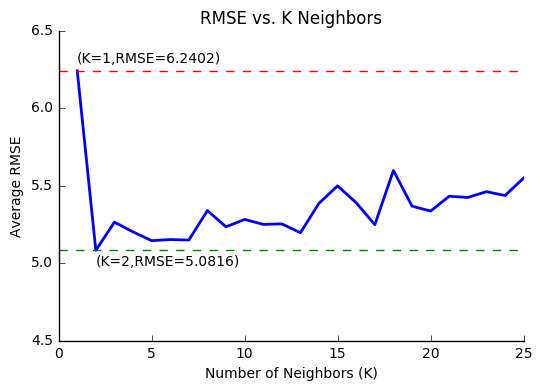

In [23]:
#Plot a line showing the calculated average RMSE for 10-fold cross-validation for the model.
#Predicting features ["CRIM","ZN","RM","AGE","DIS","TAX"] used for 
#Predicted response ["MEDV"]

#Assign K_values as a sequence from 1 to 25 for the plot's x-axis.
K_values = np.arange(K_min, K_max+1)

#Find K with largest and smallest RMSE for plot
max_knn_RMSE = -1
min_knn_RMSE = 10000
max_knn_K = 0
min_knn_K = 0
for i in range(len(nn_K)):
    if nn_K[i] > max_knn_RMSE:
        max_knn_RMSE = nn_K[i]
        max_knn_K = i+1
    if nn_K[i] < min_knn_RMSE:
        min_knn_RMSE = nn_K[i]
        min_knn_K = i+1

#Create plot space, and draw the trend line
ax3 = plt.subplot(111)
ax3.plot(K_values, nn_K, linewidth=2)

#Add horizontal lines to highlight the maximum and minimum average RMSEs
ax3.axhline(y=max_knn_RMSE, ls="--", c="red")
ax3.axhline(y=min_knn_RMSE, ls="--", c="green")

#Add text for the (K,avg_rmse) pairs corresponding to the minimum and maximum average RMSEs
ax3.text(x=max_knn_K, y=max_knn_RMSE+0.05, s="(K=%i,RMSE=%.4f)" % (max_knn_K,max_knn_RMSE), fontsize=10)
ax3.text(x=min_knn_K, y=min_knn_RMSE-0.1, s="(K=%i,RMSE=%.4f)" % (min_knn_K,min_knn_RMSE), fontsize=10)

#Set wider bounds for y-axis

ax3.set_ybound(4.5,6.5)

#Get rid of axes and tick marks on top and right
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.yaxis.set_ticks_position("left")
ax3.xaxis.set_ticks_position("bottom")

#Add title, xlabels, and ylabels
plt.title("RMSE vs. K Neighbors")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Average RMSE")

#Show Plot
plt.show()

The plot above will vary depending on the randomization that occurs during cross-validation. However, the maximum average RMSE corresponded with K=1 for each of my test runs—indicating that K=1 neighbor isn't enough to produce the optimal model for predicting median home values (using the six given predicting features).

Over many tests, I found the plot's minimum corresponded with a relatively flat section occurring betweeen K=2 and K=8. As K increases beyond this range, the average RMSE always increased—likely due to overfitting after performing cross-validation. 

I would opt for using K=5 neighbors to reach a reasonably minimized RMSE within the "flat section" while simultaneously minimizing the risk of overfitting.